In [3]:
import fluxback as fb
import fluxback.activation as act

In [21]:
x = fb.Tensor(2., requires_grad=True)
y = fb.Tensor(3., requires_grad=True)

z = (x*x) + 2.*(x*y)

z

tensor(16.0)

In [22]:
z.zero()
z.back()

In [23]:
x.grad

array(10.)

In [24]:
y.grad

array(4.)

In [3]:
x = fb.Tensor(2., requires_grad=True)
y = fb.Tensor(3., requires_grad=True)

z = (x*x) + 2.*(x*y)

z.zero()
z.back()
print(x)
print(x.grad)
x -= (0.1 * x.grad)
print(x)

tensor(2.0)
10.0
tensor(1.0)


In [ ]:
y = fb.tensor.randn((), requires_grad=True)

z = 1. - y

z.zero()
z.back()

print(y.grad)

-1.0


### Unary operators

In [ ]:
# negation
a = fb.tensor(2., requires_grad=True)
b = -a

b.zero()
b.back()

a.grad

array(-1.)

In [ ]:
# absolute value
a = fb.tensor([3., -2.], requires_grad=True)

b = abs(a).sum()

b.zero()
b.back()

a.grad

array([ 1., -1.])

## Softmax

In [1]:
import fluxback as fb
x = fb.Tensor([0., 3., 5.], requires_grad=True)

#sm = act.SoftMax()

ex = x.exp()
y = ex / ex.sum()

#y = sm(x)

label = fb.Tensor([0., 0., 1.], requires_grad=True)

sub = y - label
ab = abs(sub)

loss = ab.sum()

print(y)

loss.zero()
loss.back()

x.grad

tensor([0.00589975 0.11849965 0.8756006 ])


array([ 0.01033165,  0.20751674, -0.21784839])

In [2]:
label.grad

array([-1., -1.,  1.])

In [3]:
import numpy as np
j = np.outer(y.values, y.values) + np.diag(y.values)
j.sum(axis=1)

array([0.0117995 , 0.23699931, 1.75120119])

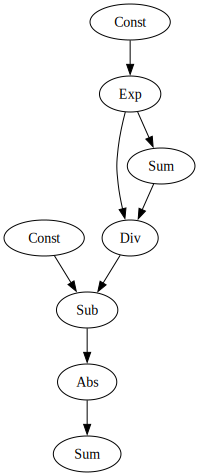

In [4]:
loss.graphviz()

# Leaky ReLU

In [ ]:
x = fb.tensor([0., -3., 5.], requires_grad=True)

y = x.max(0.1 * x)

print(y)

tensor([ 0.  -0.3  5. ])


In [ ]:
z = y.sum()
z.zero()
z.back()

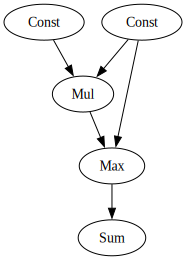

In [ ]:
z.graphviz()

# Tensor reshaping

In [ ]:
a = fb.tensor([[1., 2.], [3., 4.]], requires_grad=True)
b = a.reshape((4,)).sum()

b.zero()
b.back()
a.grad

array([[1., 1.],
       [1., 1.]])

## Matrix multiplication

In [ ]:
a = fb.tensor([[1., 2.], [3., 4.]], requires_grad=True)
b = fb.tensor([5., 6.], requires_grad=True)

c = a @ b

g = c.sum()

g.zero()
g.back()

a.grad

array([[11., 11.],
       [11., 11.]])

In [ ]:
b.grad

array([4., 6.])

# Activation

In [ ]:
x = fb.tensor([-1., 0., 1.], requires_grad=True)
sigmoid = act.Sigmoid()
y = sigmoid(x)
z = y.sum()

z.zero()
z.back()

x.grad

array([0.19661193, 0.25      , 0.19661193])

In [ ]:
(y.grad * y.values * (1. - y.values)).shape

(3,)

In [ ]:
x.values.shape

(3,)

In [ ]:
y.values.shape

(3,)

In [ ]:
y.grad.shape

(3,)

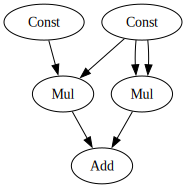

In [ ]:
x = fb.tensor(2., requires_grad=True)
y = fb.tensor(3., requires_grad=True)

z = (x*x) + (x*y)

z.graphviz()